**Import Requisite Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load the Data**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PROJECTS/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Basic EDA**

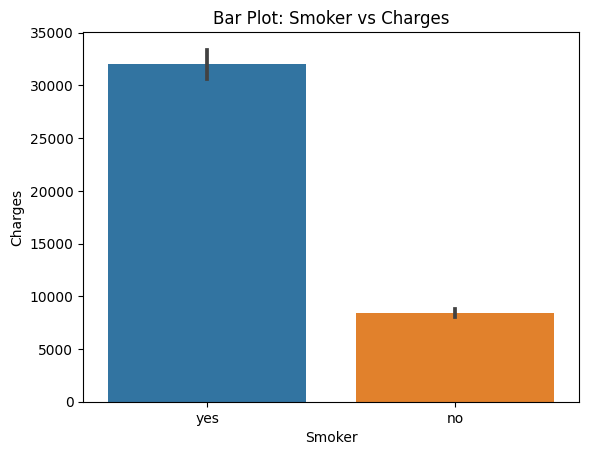

In [ ]:
sns.barplot(x='smoker', y='charges', data=df)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Bar Plot: Smoker vs Charges')
plt.show()

*Here I have observed the smoker having more charges than a non smoker*

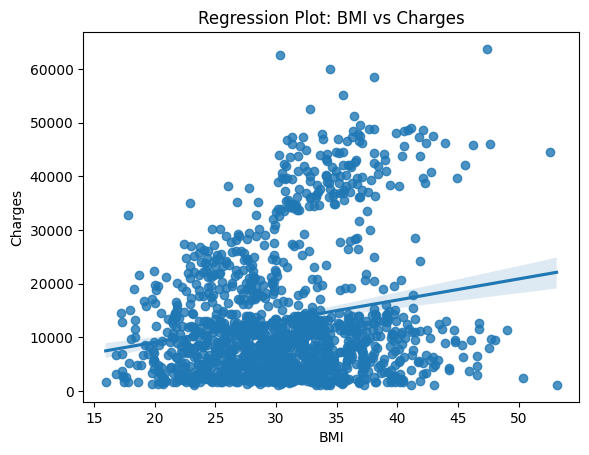

In [ ]:
sns.regplot(x='bmi', y='charges', data=df)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Regression Plot: BMI vs Charges')
plt.show()

*There is more relationship between 20 to 45 bmi of chargesof 10000*

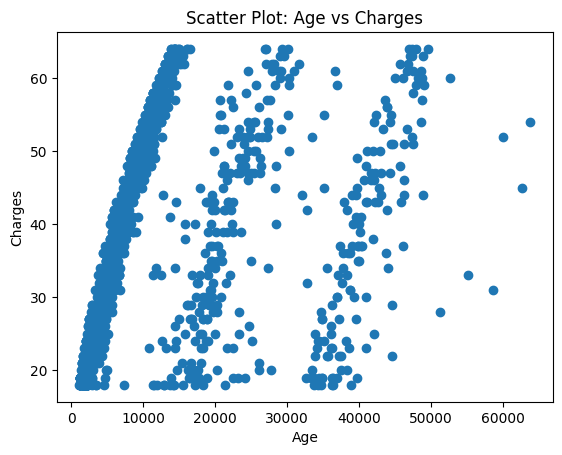

In [ ]:
plt.scatter(y=df['age'], x=df['charges'])
plt.xlabel('Charges')
plt.ylabel('Age')
plt.title('Scatter Plot: Age vs Charges')
plt.show()

<ipython-input-13-044cd59bbb62>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='coolwarm')


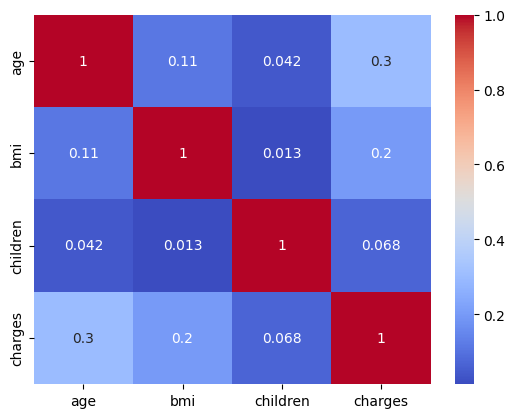

In [ ]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

*There is none of the features does not have strong relationship*

**Data Preparation**

In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train,X_test,y_train,y_test=split(X,y,test_size=0.25,random_state=42)

**Data Transformation**

In [ ]:
# Data Transformation on Categorical Columns:LabelEncoding,One-Hot Encoding
le=LabelEncoder()

# Train Data
X_train["sex"] = le.fit_transform(X_train["sex"])
X_train["smoker"] = le.fit_transform(X_train["smoker"])

# Explicitly specify columns for one-hot encoding
X_train = pd.get_dummies(X_train, columns=['region'], drop_first=True, dummy_na=False)

In [ ]:
# Data Transformation on Numerical Columns:Standardisation
numerical_columns = ["age","bmi","children"]
scaler=StandardScaler()
X_train_transformed =scaler.fit_transform(X_train[numerical_columns])
X_test_transformed =scaler.transform(X_test[numerical_columns])

**Model Building**

In [ ]:
# Using KNN Classifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

KNN= KNeighborsRegressor()
KNN.fit(X_train_transformed,y_train)

# Make predictions on the test set
y_pred = KNN.predict(X_test_transformed)

mae = mean_absolute_error(y_test, y_pred)
print("KNearestNeighbors of MAE:", mae)

KNearestNeighbors of MAE: 9265.184592522388


In [ ]:
## Using Linear Regression
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(X_train_transformed,y_train)

# Make predictions on the test set
y_pred = Lr.predict(X_test_transformed)

mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression of MAE:", mae)

Linear Regression of MAE: 9181.554834229108


In [ ]:
## Using Support Vector Machine
from sklearn.svm import SVR
SVC= SVR()
SVC.fit(X_train_transformed,y_train)

# Make predictions on the test set
y_pred = SVC.predict(X_test_transformed)

mae = mean_absolute_error(y_test, y_pred)
print("SupportVectorMachine of  MAE:", mae)

SupportVectorMachine of  MAE: 8475.754047112183


In [ ]:
## Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train_transformed,y_train)

# Make predictions on the test set
y_pred = DT.predict(X_test_transformed)

mae = mean_absolute_error(y_test, y_pred)
print("DecisionTreeClassifier of MAE:", mae)

DecisionTreeClassifier of MAE: 10715.9615755403


In [ ]:
## Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train_transformed,y_train)

# Make predictions on the test set
y_pred = RF.predict(X_test_transformed)

mae = mean_absolute_error(y_test, y_pred)
print("Random Forest of MAE:", mae)

Random Forest of MAE: 9338.832985467687


**Plot of all algorithms with their scores**

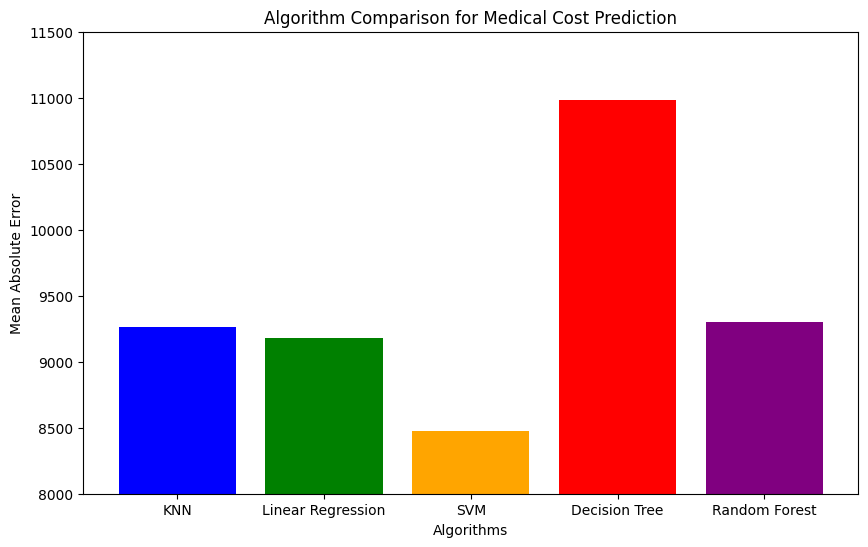

In [ ]:
algorithms = ['KNN', 'Linear Regression', 'SVM', 'Decision Tree', 'Random Forest']

mae_scores = [9265.18, 9181.55, 8475.75, 10979.67, 9298.16]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, mae_scores, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Algorithms')
plt.ylabel('Mean Absolute Error')
plt.title('Algorithm Comparison for Medical Cost Prediction')
plt.ylim(8000,11500)
plt.show()

The **Mean Absolute Error (MAE)** is a metric used to evaluate the performance of a regression model. It measures the average absolute difference between the predicted values and the actual values.

A lower MAE indicates better performance, as it means the model is making more accurate predictions. When comparing different models, the one with the lowest MAE is generally considered to be the better-performing model.

**1.**The Support Vector Machine (SVM) algorithm has
the lowest MAE, indicating better predictive performance on average.

**2.**Linear Regression also performs reasonably well.

**3.**Random Forest and K-Nearest Neighbors (KNN) have moderate MAE scores.

**4.**Decision Tree Classifier has the highest MAE among the models.

Based on the MAE scores, **SVM** appears to be the best-performing algorithm for medical cost prediction problem.